In [963]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

kundenDf = pd.read_csv('data/kunden.csv', sep = ';')
besucherDf = pd.read_csv('data/besucher.csv', sep = ';')
kundeBundesland = pd.read_csv('data/geo.txt', sep = '\t')

In [964]:
# Bereinigte Daten Bundesland
kundeBundesland['Niederlassung'] = kundeBundesland['Niederlassung'].replace({
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin',
    'BERLIN': 'Berlin',
    'NRW': 'Nordrhein-Westfalen',
    'Düsseldorf': 'Nordrhein-Westfalen'
})

# Die Analyse des Elektroauto-Marktes: Kundenpräferenzen, sozioökonomische Merkmale und Kaufmotivation bei Elektratuto AG

# Gliederung
- Erfolgsfaktoren und Marktanalyse CEO
- Kundenanalyse
- Statistische Analysen
- Regressionsanalysen
- Probleme
- Empfehlungen fuer die Zukunft

# Erfolgsfaktoren und Marktanalyse

In [965]:
anzahl_kunden = kundenDf['Alter'].count()
print(f'- Gesamtanzahl der verkauften Autos: {anzahl_kunden}')

preis = kundenDf['Preis']

max = round(preis.max(),2)
min = round(preis.min(),2)
mean = round(preis.mean(),2)

print(f'- Bei einem Hoechstpreis von = {max}&euro;, \n Mindestpreis von = {min} &euro; und Durchschnittspreis von = {mean} €')

sum = preis.sum().round()

print(f'- Es ergibt sich ein Gesamtumsatz von {sum}€')

- Gesamtanzahl der verkauften Autos: 1104
- Bei einem Hoechstpreis von = 165482.31&euro;, 
 Mindestpreis von = 21471.65 &euro; und Durchschnittspreis von = 88975.2 €
- Es ergibt sich ein Gesamtumsatz von 98228619.0€


Regionale Marktdurchdringung

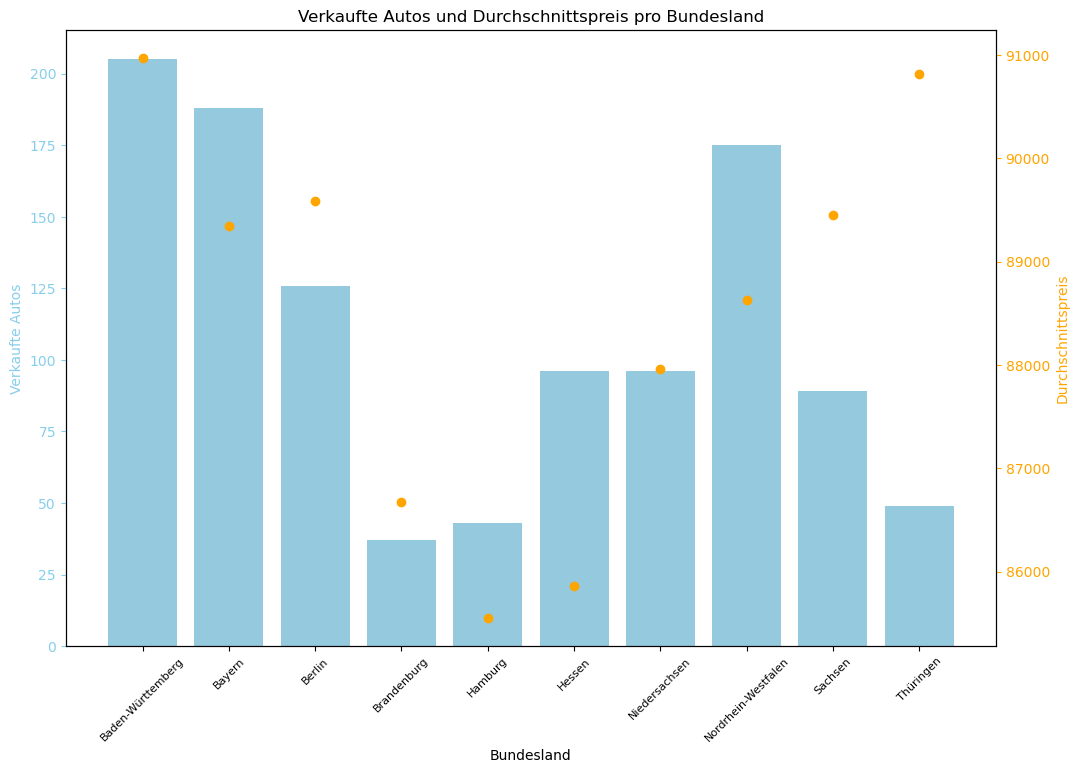

In [966]:
kundenDfMerged = pd.merge(kundenDf, kundeBundesland, on='KundeNr')

# Anzahl verkauften Autos
anzahl_autos_pro_bundesland = kundenDfMerged.groupby('Niederlassung')['KundeNr'].count().reset_index()
anzahl_autos_pro_bundesland.columns = ['Bundesland', 'VerkaufteAutos']

# durchschnittlichen Umsatzes
durchschnittsumsatz_pro_bundesland = kundenDfMerged.groupby('Niederlassung')['Preis'].mean().reset_index()
durchschnittsumsatz_pro_bundesland.columns = ['Bundesland', 'Durchschnittspreis']

ergebnisse_df = pd.merge(anzahl_autos_pro_bundesland, durchschnittsumsatz_pro_bundesland, on='Bundesland')

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x='Bundesland', y='VerkaufteAutos', data=ergebnisse_df, ax=ax1, color='skyblue')
ax1.set_ylabel('Verkaufte Autos', color='skyblue')
ax1.tick_params('y', colors='skyblue')

ax1.tick_params(axis='x', rotation=45, labelsize=8)

ax2 = ax1.twinx()
plt.plot(ergebnisse_df['Bundesland'], ergebnisse_df['Durchschnittspreis'], marker='o', linestyle='', color='orange')

ax2.set_ylabel('Durchschnittspreis', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('Verkaufte Autos und Durchschnittspreis pro Bundesland')
plt.show()

Welche Merkmale der Kunden beeinflussen den Kaufpreis?

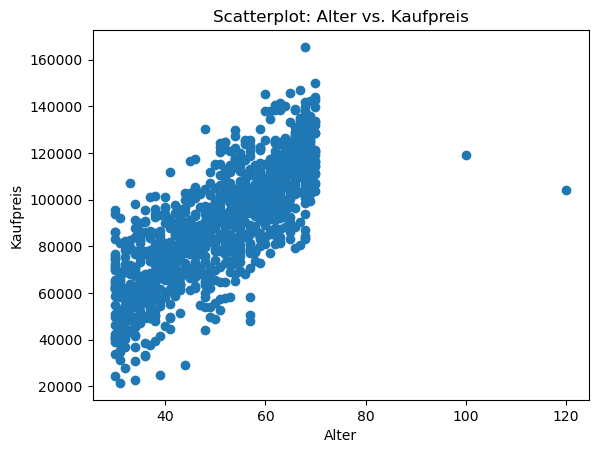

In [967]:
kundenDf = kundenDf.dropna(subset=['Geschlecht'])
abhängige_variablen = ['Alter', 'Einkommen', 'Geschlecht', 'Zeit']

unabhängige_variablen = sm.add_constant(kundenDf[abhängige_variablen])

# Zielvariable (abhängige Variable)
abhängige_variable = kundenDf['Preis']

# Lineare Regression
modell = sm.OLS(abhängige_variable, unabhängige_variablen).fit()

unabhängige_variablen = unabhängige_variablen.dropna()

#modell.summary()

plt.scatter(kundenDf['Alter'], kundenDf['Preis'])
plt.xlabel('Alter')
plt.ylabel('Kaufpreis')
plt.title('Scatterplot: Alter vs. Kaufpreis')
plt.show()

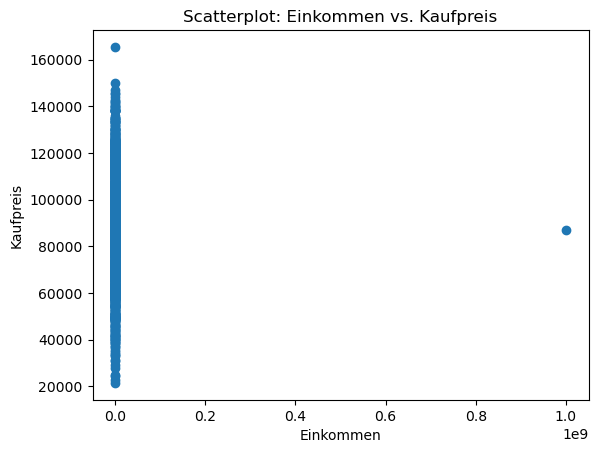

In [968]:
plt.scatter(kundenDf['Einkommen'], kundenDf['Preis'])
plt.xlabel('Einkommen')
plt.ylabel('Kaufpreis')
plt.title('Scatterplot: Einkommen vs. Kaufpreis')
plt.show()

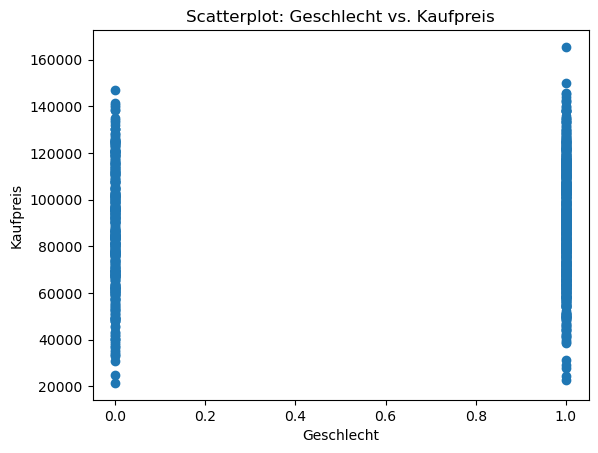

In [969]:
plt.scatter(kundenDf['Geschlecht'], kundenDf['Preis'])
plt.xlabel('Geschlecht')
plt.ylabel('Kaufpreis')
plt.title('Scatterplot: Geschlecht vs. Kaufpreis')
plt.show()

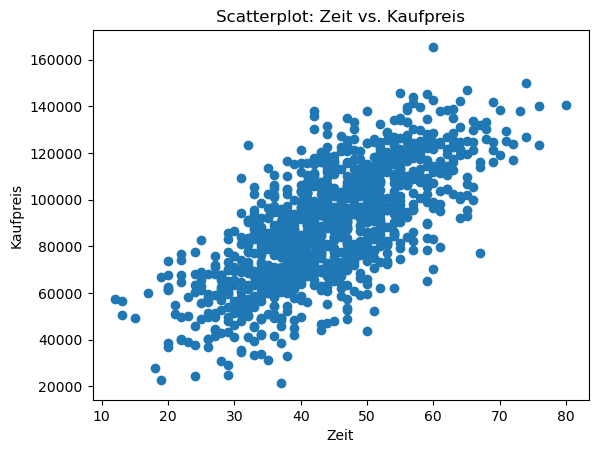

In [970]:
plt.scatter(kundenDf['Zeit'], kundenDf['Preis'])
plt.xlabel('Zeit')
plt.ylabel('Kaufpreis')
plt.title('Scatterplot: Zeit vs. Kaufpreis')
plt.show()

Berechnung

In [971]:
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     629.9
Date:                Thu, 04 Jan 2024   Prob (F-statistic):          5.50e-282
Time:                        15:20:16   Log-Likelihood:                -12006.
No. Observations:                1099   AIC:                         2.402e+04
Df Residuals:                    1094   BIC:                         2.405e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6428.9545   1986.029     -3.237      0.001   -1.03e+04   -2532.097
Alter       1088.7963     40.962     26.581      0.000    1008.424    1169.169
Einkommen  -2.566e-05   1.35e-05     -1.902      0.057   -5.21e-05    8.14e-07
Geschlecht  2787.4008    845.760      3.296      0.001    1127.905    4446.897
Zeit         871.9854     46.206     18.872      0.000     781.323     962.648
==============================================================================
Omnibus:                       21.651   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.229
Skew:                          -0.187   Prob(JB):                     1.00e-07
Kurtosis:                       3.751   Cond. No.                     1.49e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Kundenanalyse

Geschlechtsverteilung der Kunden

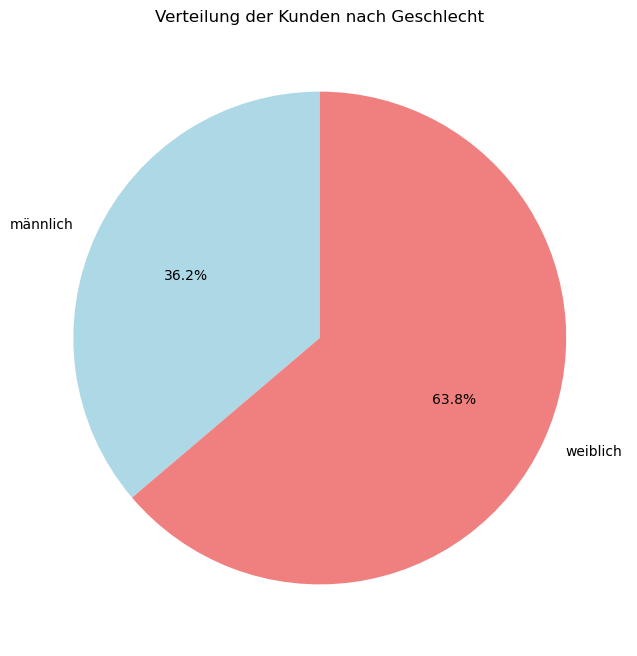

In [972]:
kundenDf['Geschlecht'] = kundenDf['Geschlecht'].replace({0: 'männlich', 1: 'weiblich'})

geschlechtsverteilung = kundenDf.groupby(by='Geschlecht').count()

plt.figure(figsize=(8, 8))
plt.pie(geschlechtsverteilung['KundeNr'], labels=geschlechtsverteilung.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Verteilung der Kunden nach Geschlecht')
plt.show()

Durchschnittsalter der Kunden

In [973]:
round(kundenDf['Alter'].mean())

50

Durchschnittsalter der Besucher in Showrooms

In [974]:
round(besucherDf['Alter'].mean())

50

Durchschnittsalter der maennlichen Kunden

In [975]:
kundenDf[kundenDf['Geschlecht'] == 'männlich'][['Geschlecht', 'Alter']].groupby(by='Geschlecht').mean().round()

,Alter
Geschlecht,
männlich,50.0


Durchschnittseinkommen der Kunden

In [976]:
einkommenMean = kundenDf['Einkommen'].mean().round()

print(f'Durchschnittseinkommen = {einkommenMean}€')

Durchschnittseinkommen = 968555.0€


# Statistische Analysen

Abhaengigkeit zwischen Alter, Einkommen, Preis und Zeit

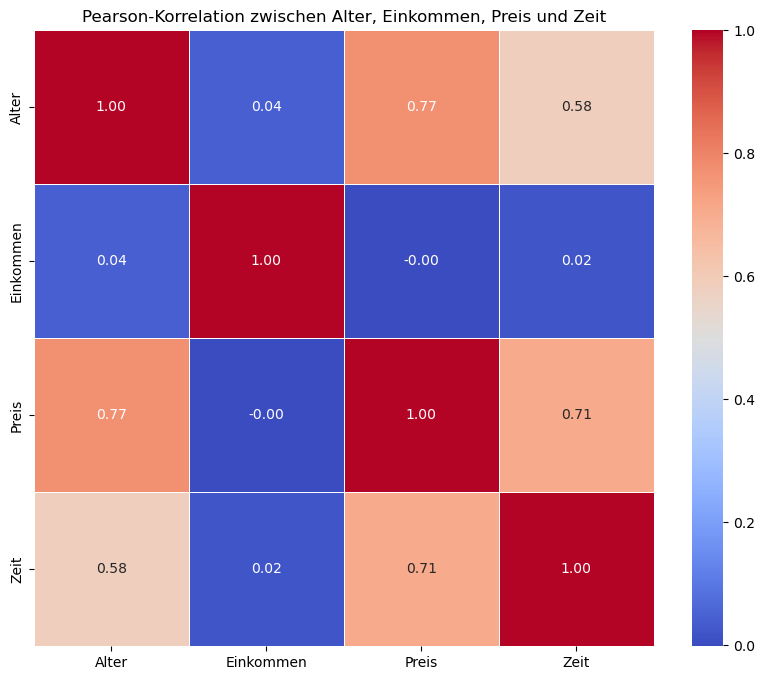

In [977]:
kundenDf_kunden = kundenDf.dropna(subset=['Alter', 'Einkommen', 'Preis', 'Zeit'])

kundenDf_kunden = kundenDf.dropna(subset=['Alter', 'Einkommen', 'Preis', 'Zeit'])

# Pearson-Korrelation
korrelation_matrix = kundenDf_kunden[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(korrelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson-Korrelation zwischen Alter, Einkommen, Preis und Zeit')
plt.show()

Wie viel Zeit verbringen Kunden und Besucher bei uns?

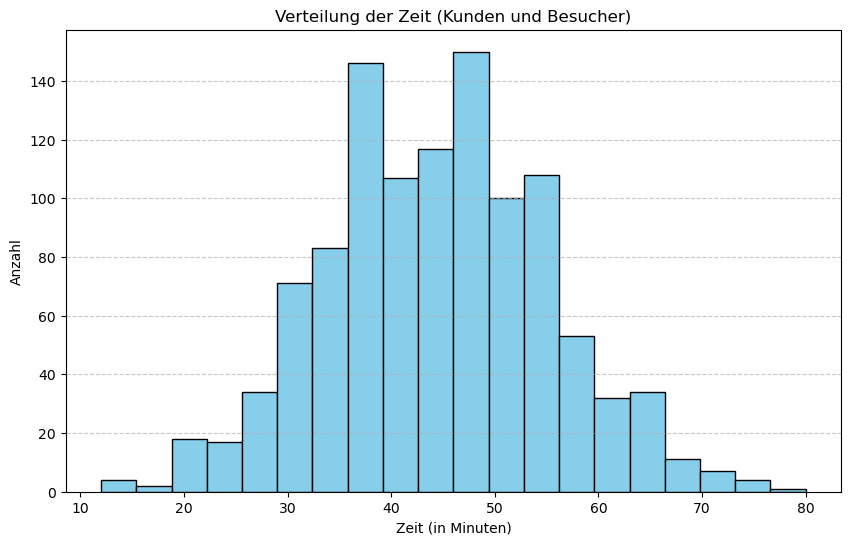

In [978]:
merged_df = pd.concat([kundenDf, besucherDf])

merged_df['Zeit'] = pd.to_numeric(merged_df['Zeit'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(merged_df['Zeit'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Verteilung der Zeit (Kunden und Besucher)')
plt.xlabel('Zeit (in Minuten)')
plt.ylabel('Anzahl')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kunden mit Krediten

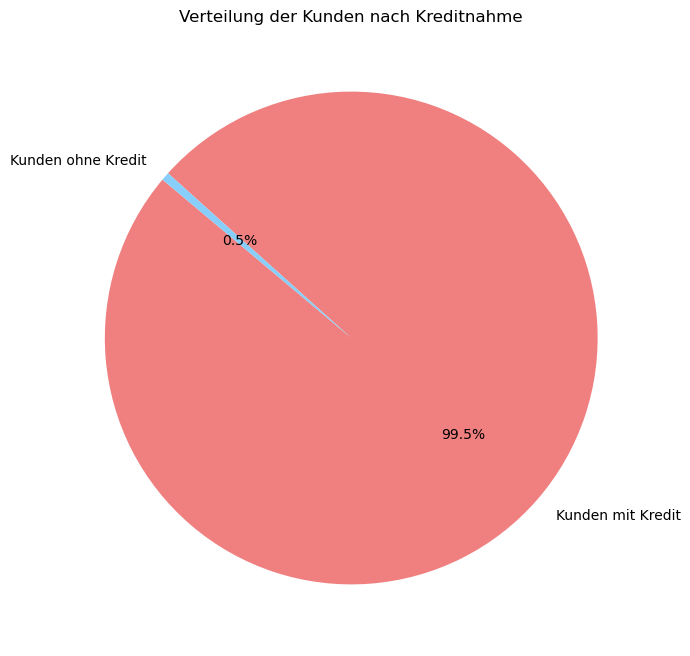

In [979]:
kundenDf['Kredit genommen'] = (kundenDf['Einkommen'] <= kundenDf['Preis']).astype(int)

anzahl_kunden_mit_kredit = kundenDf['Kredit genommen'].value_counts().get(1, 0)
anzahl_kunden_ohne_kredit = kundenDf['Kredit genommen'].value_counts().get(0, 0)

#Diagramm
labels = ['Kunden mit Kredit', 'Kunden ohne Kredit']
sizes = [anzahl_kunden_mit_kredit, anzahl_kunden_ohne_kredit]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der Kunden nach Kreditnahme')
plt.show()

# Regressionsanalysen

Prognostizierter Kaufpreis eines unserer Autos

In [980]:
kundenDf['Geschlecht'] = kundenDf['Geschlecht'].replace({"männlich": 0, "weiblich": 1})
features = ['Alter', 'Einkommen', 'Geschlecht']

# X: Unabhängige Variablen, y: Abhängige Variable (Preis)
X = kundenDf[features]
y = kundenDf['Preis']

# Modell initialisieren und trainieren
model = LinearRegression()
model.fit(X, y)

# Prognose für den ersten Kunden (Alter: 32, Einkommen: 30.000, Geschlecht: männlich)
kunde1 = [[32, 30000, 1]]
kaufpreis1 = model.predict(kunde1)
print(f"Prognostizierter Kaufpreis für einen Kunden (Alter: 32, Einkommen: 30.000, Geschlecht: maennlich): {kaufpreis1[0]:.2f} Euro")

# Prognose für den zweiten Kunden (Alter: 51, Einkommen: 54.000, Geschlecht: männlich)
kunde2 = [[51, 54000, 1]]
kaufpreis2 = model.predict(kunde2)
print(f"Prognostizierter Kaufpreis für einen Kunden (Alter: 51, Einkommen: 54.000, Geschlecht: maennlich): {kaufpreis2[0]:.2f} Euro")

Prognostizierter Kaufpreis für einen Kunden (Alter: 32, Einkommen: 30.000, Geschlecht: maennlich): 61645.63 Euro
Prognostizierter Kaufpreis für einen Kunden (Alter: 51, Einkommen: 54.000, Geschlecht: maennlich): 90912.28 Euro


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Welche Variable beeinflusst den Preis am meisten?

In [981]:
kundenDf = pd.get_dummies(kundenDf, columns=['Geschlecht'], drop_first=True)

features = ['Alter', 'Einkommen', 'Geschlecht_1']

# X: Unabhängige Variablen, y: Abhängige Variable (Preis)
X = kundenDf[features]
y = kundenDf['Preis']

# Modell initialisieren und trainieren
model = LinearRegression()
model.fit(X, y)

beta_values = model.coef_

for feature, beta in zip(features, beta_values):
    print(f"{feature}: {beta:.4f}")

max_influencing_variable = features[abs(beta_values).argmax()]
print(f"\nHierbei beeinflusst folgende Variable den Preis am meisten: {max_influencing_variable} (maennliches Geschlecht)")

Alter: 1540.3833
Einkommen: -0.0000
Geschlecht_1: 3092.1652

Hierbei beeinflusst folgende Variable den Preis am meisten: Geschlecht_1 (maennliches Geschlecht)


Mit welcher Wahrscheinlichkeit wird bei uns ein Auto gekauft?

In [982]:
SCHWELLENWERT = kundenDf['Preis'].mean()
kundenDf['Kauf'] = (kundenDf['Preis'] > SCHWELLENWERT).astype(int)

# X: Unabhängige Variablen, y: Binäre Abhängige Variable (Kauf: 1 oder Nicht-Kauf: 0)
X = kundenDf[features]
y = kundenDf['Kauf']

# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisierung der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modell initialisieren und trainieren
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Vorhersagen für Testdaten
y_pred = model.predict(X_test_scaled)

# Auswertung der Modellleistung
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des Modells: {accuracy:.2%}")

# Weitere Auswertungsmetriken anzeigen
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

Genauigkeit des Modells: 81.82%
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.78      0.81      0.79        94

    accuracy                           0.82       220
   macro avg       0.81      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220



Mit welcher Wahrscheinlichkeit wird bei uns ein getestetes Auto gekauft?

In [983]:
features = ['Alter', 'Einkommen', 'Geschlecht_1', 'Zeit']

# X: Unabhängige Variablen, y: Binäre Abhängige Variable (Kauf: 1 oder Nicht-Kauf: 0)
X = kundenDf[features]
y = kundenDf['Kauf']

# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modell initialisieren und trainieren
model = LogisticRegression()
model.fit(X_scaled, y)

# Funktion zur Berechnung der Wahrscheinlichkeit eines Kaufs
def wahrscheinlichkeit_kauf(model, daten):
    daten_scaled = scaler.transform(daten)
    proba = model.predict_proba(daten_scaled)[:, 1]
    return proba

# Beispiel-Kunden
kunde1 = [[32, 30000, 1, 30]]  # Alter: 32, Einkommen: 30.000, Geschlecht: männlich, Zeit: 30 Minuten
kunde2 = [[51, 54000, 1, 45]]  # Alter: 51, Einkommen: 54.000, Geschlecht: männlich, Zeit: 45 Minuten

# Wahrscheinlichkeiten berechnen
wahrscheinlichkeit1 = wahrscheinlichkeit_kauf(model, kunde1)
wahrscheinlichkeit2 = wahrscheinlichkeit_kauf(model, kunde2)

print(f"Kaufwahrscheinlichkeit für Kunden (Alter: 32, Einkommen: 30.000, Geschlecht: männlich, Zeit: 30 Minuten): {wahrscheinlichkeit1[0]:.2%}")
print(f"Kaufwahrscheinlichkeit für Kunden (Alter: 51, Einkommen: 54.000, Geschlecht: männlich, Zeit: 45 Minuten): {wahrscheinlichkeit2[0]:.2%}")

Kaufwahrscheinlichkeit für Kunden (Alter: 32, Einkommen: 30.000, Geschlecht: männlich, Zeit: 30 Minuten): 1.60%
Kaufwahrscheinlichkeit für Kunden (Alter: 51, Einkommen: 54.000, Geschlecht: männlich, Zeit: 45 Minuten): 57.73%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Probleme

Probleme
- Unterschiedliche Formate in den Daten zB Geschlecht als 1.0 und 1

# Empfelungen fuer die Zukunft

Empfelungen fuer die Zukunft
- Einheitliche Datentypen

# Vielen Dank fuer eure Aufmerksamkeit